In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

import os

In [2]:
#explore individual files
df = pd.read_csv("New York_temp_avg_annual_dec.csv", skiprows = range(0,3))

In [3]:
df['Date'] = df['Date'].map((lambda x: str(x)[:-2]))

In [4]:
df['Date'] = df['Date'].apply(lambda x: int(x))

In [5]:
#anomaly indicates how far off from the temperature or precipitation normal the annual value is
#interesting, but not relevant for this project
df.head()

,Date,Value,Anomaly
0,1895,43.5,-1.0
1,1896,44.1,-0.4
2,1897,44.4,-0.1
3,1898,46.0,1.5
4,1899,44.7,0.2


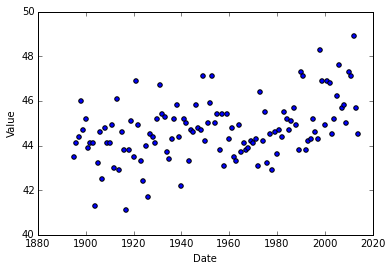

In [6]:
df.plot(kind="scatter",x="Date",y="Value")

In [7]:
df.corr()

,Date,Value,Anomaly
Date,1.000000,0.419663,0.419663
Value,0.419663,1.000000,1.000000
Anomaly,0.419663,1.000000,1.000000


In [8]:
data = np.asarray(df[['Date','Value']])
x, y = data[:, :1], data[:, 1]

In [9]:
data

array([[ 1895. ,    43.5],
       [ 1896. ,    44.1],
       [ 1897. ,    44.4],
       [ 1898. ,    46. ],
       [ 1899. ,    44.7],
       [ 1900. ,    45.2],
       [ 1901. ,    43.9],
       [ 1902. ,    44.1],
       [ 1903. ,    44.1],
       [ 1904. ,    41.3],
       [ 1905. ,    43.2],
       [ 1906. ,    44.6],
       [ 1907. ,    42.5],
       [ 1908. ,    44.8],
       [ 1909. ,    44.1],
       [ 1910. ,    44.1],
       [ 1911. ,    44.9],
       [ 1912. ,    43. ],
       [ 1913. ,    46.1],
       [ 1914. ,    42.9],
       [ 1915. ,    44.6],
       [ 1916. ,    43.8],
       [ 1917. ,    41.1],
       [ 1918. ,    43.8],
       [ 1919. ,    45.1],
       [ 1920. ,    43.5],
       [ 1921. ,    46.9],
       [ 1922. ,    44.9],
       [ 1923. ,    43.3],
       [ 1924. ,    42.4],
       [ 1925. ,    44. ],
       [ 1926. ,    41.7],
       [ 1927. ,    44.5],
       [ 1928. ,    44.4],
       [ 1929. ,    44.1],
       [ 1930. ,    45.2],
       [ 1931. ,    46.7],
 

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [12]:
m = lr.coef_[0]

In [13]:
m

0.016309118688797836

In [14]:
b = lr.intercept_

In [15]:
b

12.837994189411301

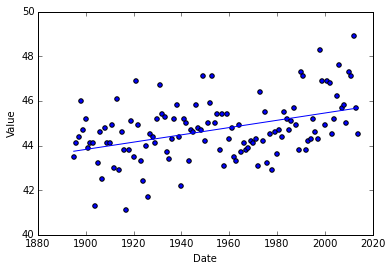

In [16]:
df.plot(kind="scatter",x="Date",y="Value")
plt.plot(df['Date'],m*df['Date']+b,'-')

In [17]:
lr.score(x,y)

0.1761173404085391

In [18]:
#create predictor to play with
def pred_temp(Date):
    return (m*Date) + (b)

In [19]:
pred_temp(2020)

45.782413940782931

In [20]:
pred_temp(2030)

45.945505127670913

In [160]:
#function to generate regression models for each state/set of parameters

def genModels(filesToRead):
    modelDict = {}
    for file in filesToRead:
        #print file
        stateName = file.split('_')[0]
        df = pd.read_csv(file, skiprows = range(0,3))
        df['Date'] = df['Date'].map((lambda x: str(x)[:-2]))
        df['Date'] = df['Date'].apply(lambda x: int(x))
        #print df.corr()
        data = np.asarray(df[['Date','Value']])
        x, y = data[:, :1], data[:, 1]
        lr = LinearRegression()
        lr.fit(x,y)
        m = lr.coef_[0]
        b = lr.intercept_
        #df.plot(kind="scatter",x="Date",y="Value")
        #plt.plot(df['Date'],m*df['Date']+b,'-')
        #print lr.score(x,y)
        modelDict[stateName] = (m,b)
    return modelDict

#function to iterate through all files

def filterFiles(filterWords):
    folder = os.getcwd() #'C:\\Users\\Meghan\\Desktop\\lede\\final_project'
    os.chdir(folder)
    files=[file for file in os.listdir(".") if not file.startswith('.')]
    files=[file for file in files if not os.path.isdir(file)==True]
    # files=[file for file in files if "temp_avg" in file and "annual" in file and "dec" in file]
    return [file for file in files if all(filter in file for filter in filterWords)]
    
#define dictionary of  models
#using yearly data, jan for cold month, and july for warm month
    
models={}
models["temp_avg_annual_dec"] = genModels(filterFiles(["temp_avg","annual","dec"]))
models["temp_avg_1month_july"] = genModels(filterFiles(["temp_avg","1month","july"]))
models["temp_avg_1month_jan"] = genModels(filterFiles(["temp_avg","1month","jan"]))
models["precip_annual_dec"] = genModels(filterFiles(["precip","annual","dec"]))

#linear predictor!

def linearPredictor(year,model):
    m,b = model
    return (m*year) + (b)
    
#test it out on Illinois
    
linearPredictor(2020, models["precip_annual_dec"]["Illinois"])



40.32868191078083

In [236]:
# ranges for our predictor compare

# 68F warm month mean (no higher than 95)
ranges={}
ranges["tiger"]={}
ranges["tiger"]["temp_range_july"] = (68,95)
# cold month
ranges["tiger"]["temp_range_jan"]  = (33,-1)
# > 19.69in rain per year
ranges["tiger"]["precip_range"] = (19.7,-1)


ranges["house"]={}
# larvae
ranges["house"]["temp_range_annual"] = (50,84.2)
# adults
ranges["house"]["temp_range_july"] = (-1,89.6)
# rain more than 1.75in per month
ranges["house"]["precip_range"]=(1.75*12,-1)


print ranges["house"]

{'temp_range_july': (-1, 89.6), 'precip_range': (21.0, -1), 'temp_range_annual': (50, 84.2)}


In [86]:
#just use the keys from the fips codes dictionary 

states = {"Alabama": "01", "Arizona": "02", "Arkansas": "03", "California": "04", "Colorado": "05", 
              "Connecticut": "06", "Delaware": "07", "Florida": "08", "Georgia": "09", "Idaho": "10", 
              "Illinois": "11", "Indiana": "12", "Iowa": "13", "Kansas": "14", "Kentucky": "15", "Louisiana": "16", "Maine": "17",
              "Maryland": "18", "Massachusetts": "19", "Michigan": "20", "Minnesota": "21", "Mississippi": "22", "Missouri": "23", 
              "Montana": "24", "Nebraska": "25", "Nevada": "26", "New Hampshire": "27", "New Jersey": "28", "New Mexico": "29", 
              "New York": "30", "North Carolina": "31", "North Dakota": "32", "Ohio": "33", "Oklahoma": "34", "Oregon": "35", 
              "Pennsylvania": "36", "Rhode Island": "37", "South Carolina": "38", "South Dakota": "39", "Tennessee": "40", 
              "Texas": "41", "Utah": "42", "Vermont": "43", "Virginia": "44", "Washington": "45", "West Virginia": "46", 
              "Wisconsin": "47", "Wyoming": "48"}

In [242]:
# compare linear predictions for some year against ranges
def predictYearEnter(model, value):
    for year in range(2015,2050):
        if( value < linearPredictor(year,model) ):
            return year
    return 0


#year that a state will leave the climate range
def predictYearExit(model, value):
    for year in range(2015,2050):
        if( value  > linearPredictor(year,model) ):
            return year
    return 0

#define years within range
#calculate for present up to 2100
def yearsWithinRange(model,rangeValues):
    minYear = 2015
    maxYear = 2100
    years=[]
    low,high = rangeValues
    if( low > 0 and high > 0 ):
        years = [year for year in range(minYear,maxYear) if linearPredictor(year,model)>low and linearPredictor(year,model)<high]
    elif( low > 0 and high < 0 ):
        years = [year for year in range(minYear,maxYear) if linearPredictor(year,model)>low]
    elif( low < 0 and high > 0 ):
        years = [year for year in range(minYear,maxYear) if linearPredictor(year,model)<high]
    return years

#function for Tiger Mosquito
def predictTiger():
    for state,etc in states.items():
        # want year when state fits into all 3 predictors
        tiger_predictors=[yearsWithinRange(models["temp_avg_1month_july"][state],ranges["tiger"]["temp_range_july"]),
                          yearsWithinRange(models["temp_avg_1month_jan"][state],ranges["tiger"]["temp_range_jan"]),
                          yearsWithinRange(models["precip_annual_dec"][state],ranges["tiger"]["precip_range"])]

        intersect = sorted(list(set(tiger_predictors[0]) & set(tiger_predictors[1]) & set(tiger_predictors[2])))
        if(len(intersect) and intersect[0]):
            print state,intersect[0]
            
print "Tiger mosquitos:"
predictTiger()
print "\n"

#function for Southern House Mosquito
def predictHouse():
    for state,etc in states.items():
        # want year when state fits into all 3 predictors
        house_predictors=[yearsWithinRange(models["temp_avg_annual_dec"][state],ranges["house"]["temp_range_annual"]),
                          yearsWithinRange(models["temp_avg_1month_july"][state],ranges["house"]["temp_range_july"]),
                          yearsWithinRange(models["precip_annual_dec"][state],ranges["house"]["precip_range"])]

        intersect = sorted(list(set(house_predictors[0]) & set(house_predictors[1]) & set(house_predictors[2])))
        if(len(intersect) and intersect[0]):
            print state,intersect[0]

print "House mosquitos:"
predictHouse()

Tiger mosquitos:
Mississippi 2015
Oklahoma 2015
Delaware 2015
Arkansas 2015
Louisiana 2015
Texas 2015
California 2015
Georgia 2015
Maryland 2042
Virginia 2015
Oregon 2088
South Carolina 2015
Florida 2015
Alabama 2015
North Carolina 2015
Tennessee 2015


House mosquitos:
Mississippi 2015
Oklahoma 2015
Delaware 2015
Illinois 2015
Arkansas 2015
Indiana 2015
Louisiana 2015
Texas 2015
Kansas 2015
Connecticut 2027
California 2015
West Virginia 2015
Georgia 2015
Pennsylvania 2096
Missouri 2015
New Jersey 2015
Maryland 2015
Virginia 2015
Massachusetts 2077
South Carolina 2015
Florida 2015
Kentucky 2015
Rhode Island 2015
Nebraska 2066
Ohio 2015
Alabama 2015
North Carolina 2015
Tennessee 2015
